In [1]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
print("hello world")

hello world


In [7]:
import csv
import pandas as pd
with open('sample_eng.txt', 'r',encoding='latin1') as f:
  reader = f.readlines()
type(reader)

list

In [8]:
from nltk.tokenize import sent_tokenize
result_sent=sent_tokenize(str(reader))

In [9]:
result_sent

["['Can\\'t make any sort of payment using my tour pass.",
 'It keeps saying that my card is not supported in that app or so many other reasons.',
 'Even my account name and payment password is not working.',
 'I had to change them several times.',
 'Cannot even connect a MasterCard and half of the application is in chinese.',
 'Moreover it asks for unnecessary personal information.',
 'It is impossible to use the app to pay from outside of China.',
 'Terrible apps...reset password 3 times, keep telling me wrong password.',
 "Hey,I\\'m just copy paste form my password vault, how possible it show wrong password ?",
 "Don\\'t use,waste off time As other reviews have mentioned, this app is actually pretty bad, even for those who have a china bank account.",
 'Its just not user friendly and there are too many advertisements.',
 'Its a shame cause i was thinking of buying their stock when it IPOs.',
 "I\\'m going to stick with Tencent now since WeChat Pay is way more efficient and easier to

In [10]:
# Text cleaning 
from string import punctuation
import re

def clean_sentence(sentence):
    sentence = re.sub(r"(?:\@|https?\://)\S+|\n+", "", sentence.lower())
    # Fix spelling errors in comments!
    sent = TextBlob(sentence)
    sent.correct()
    clean = ""
    for sentence in sent.sentences:    
        words = sentence.words
        # Remove punctuations
        words = [''.join(c for c in s if c not in punctuation) for s in words]
        words = [s for s in words if s]
        clean += " ".join(words)
        clean += ". "
    return clean

result = [clean_sentence(x) for x in result_sent]
result
print(result)

['cant make any sort of payment using my tour pass. ', 'it keeps saying that my card is not supported in that app or so many other reasons. ', 'even my account name and payment password is not working. ', 'i had to change them several times. ', 'can not even connect a mastercard and half of the application is in chinese. ', 'moreover it asks for unnecessary personal information. ', 'it is impossible to use the app to pay from outside of china. ', 'terrible apps reset password 3 times keep telling me wrong password. ', 'hey i m just copy paste form my password vault how possible it show wrong password. ', 'dont use waste off time as other reviews have mentioned this app is actually pretty bad even for those who have a china bank account. ', 'its just not user friendly and there are too many advertisements. ', 'its a shame cause i was thinking of buying their stock when it ipos. ', 'i m going to stick with tencent now since wechat pay is way more efficient and easier to use. ', 'worse ap

In [11]:
# Check sentiment polarity of each sentence.
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

cant make any sort of payment using my tour pass. : POLARITY=0.0
it keeps saying that my card is not supported in that app or so many other reasons. : POLARITY=0.1875
even my account name and payment password is not working. : POLARITY=0.0
i had to change them several times. : POLARITY=0.0
can not even connect a mastercard and half of the application is in chinese. : POLARITY=-0.08333333333333333
moreover it asks for unnecessary personal information. : POLARITY=-0.2
it is impossible to use the app to pay from outside of china. : POLARITY=-0.3333333333333333
terrible apps reset password 3 times keep telling me wrong password. : POLARITY=-0.75
hey i m just copy paste form my password vault how possible it show wrong password. : POLARITY=-0.25
dont use waste off time as other reviews have mentioned this app is actually pretty bad even for those who have a china bank account. : POLARITY=-0.19374999999999998
its just not user friendly and there are too many advertisements. : POLARITY=0.4375

C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

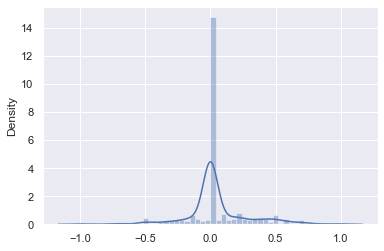

In [12]:
sns.distplot(sentiment_scores)

In [13]:
# Convert array of comments into a single string
comments = TextBlob(' '.join(result))
# Check out noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

WordList(['tour pass', 'account name', 'payment password', 'unnecessary personal information', 'terrible apps reset password', 'wrong password', 'hey i m', 'copy paste form', 'password vault', 'wrong password', 'dont use waste', 'china bank account', 'i m', 'wechat pay', 'bank account', 'mainland china', 'i hv china bank account ohh', 'taobao application', 'terrible application', 'i cant', 'bank account', 'international version', 'nonchinese card', 'identity verification', 'android apps', 'passport info phone number', 'bank card thats', 'mainland china', 'useless app', 'alibaba group', 'resource exhaustive', 'gon na', 'alibaba apps', 'bencher programmers', 'american bank', 'chinese dialect i m canadian i dont', 'international usage', 'app casters', 'asian audience', 'cambodia region', 'app chinese', 'shows system', 'useless payment app', 'frustrating app', 'cant log', 'china mainland cant login', 'i m', 'error prompts', 'i top', 'alipay account', 'login method i cant use', 'debit card'

In [14]:
#compactness pruning:
cleaned = list()
for phrase in comments.noun_phrases:
    count = 0
    for word in phrase.split():
        # Count the number of small words and words without an English definition
        if len(word) <= 2 or (not Word(word).definitions):
            count += 1
    # Only if the 'nonsensical' or short words DO NOT make up more than 40% (arbitrary) of the phrase add
    # it to the cleaned list, effectively pruning the ones not added.
    if count < len(phrase.split())*0.4:
        cleaned.append(phrase)
        
print("After compactness pruning:\nFeature Size:")
len(cleaned)

After compactness pruning:
Feature Size:


931

In [15]:
for phrase in cleaned:    
    match = list()
    temp = list()
    word_match = list()
    for word in phrase.split():
        # Find common words among all phrases
        word_match = [p for p in cleaned if re.search(word, p) and p not in word_match]
        # If the size of matched phrases set is smaller than 30% of the cleaned phrases, 
        # then consider the phrase as non-redundant.
        if len(word_match) <= len(cleaned)*0.3 :
            temp.append(word)
            match += word_match
            
    phrase = ' '.join(temp)
#     print("Match for " + phrase + ": " + str(match))

    if len(match) >= len(cleaned)*0.1 :
        # Redundant feature set, since it contains more than 10% of the number of phrases. 
        # Prune all matched features.
        for feature in match:
            if feature in cleaned:
                cleaned.remove(feature)
            
        # Add largest length phrase as feature
        cleaned.append(max(match, key=len))
        

print("After redundancy pruning:\nFeature Size:" + str(len(cleaned)))
print("Cleaned features:")
cleaned


After redundancy pruning:
Feature Size:401
Cleaned features:


['tour pass',
 'unnecessary personal information',
 'wrong password',
 'copy paste form',
 'password vault',
 'wrong password',
 'international version',
 'identity verification',
 'resource exhaustive',
 'international usage',
 'asian audience',
 'cambodia region',
 'shows system',
 'error prompts',
 'error message',
 'buyer product',
 'buyer wont pay',
 'wrong steps',
 'international version',
 'personal info',
 'people oversea',
 'international version',
 'real name',
 'passport picture',
 'customer service',
 'customer representative',
 'data traffic',
 'mb cellular data',
 'exact password',
 'reset language',
 'general language',
 'reliable means',
 'security issues',
 'identity theft',
 'big question',
 'recent update',
 'settings screen',
 'international form',
 'extra percentage',
 'international version',
 'bother making',
 'customer service center',
 'local citizen',
 'relevant info',
 'download functionality',
 'interesting features',
 'functional guides',
 'personal informa

In [16]:
from nltk.corpus import stopwords
feature_count = dict()
for phrase in cleaned:
    count = 0
    for word in phrase.split():
        if word not in stopwords.words('english'):
            count += comments.words.count(word)
    
    print(phrase + ": " + str(count))
    feature_count[phrase] = count

tour pass: 10
unnecessary personal information: 13
wrong password: 23
copy paste form: 7
password vault: 19
wrong password: 23
international version: 92
identity verification: 63
resource exhaustive: 2
international usage: 42
asian audience: 2
cambodia region: 12
shows system: 17
error prompts: 10
error message: 19
buyer product: 7
buyer wont pay: 64
wrong steps: 10
international version: 92
personal info: 11
people oversea: 14
international version: 92
real name: 18
passport picture: 39
customer service: 36
customer representative: 16
data traffic: 3
mb cellular data: 5
exact password: 19
reset language: 80
general language: 77
reliable means: 8
security issues: 9
identity theft: 29
big question: 10
recent update: 22
settings screen: 9
international form: 41
extra percentage: 3
international version: 92
bother making: 10
customer service center: 37
local citizen: 16
relevant info: 7
download functionality: 11
interesting features: 4
functional guides: 4
personal information: 10
low am

In [17]:
# Select frequent feature threshold as (max_count)/100 
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:5]
frequent_features

Threshold:15.98
 Features:


['wrong password',
 'password vault',
 'international version',
 'identity verification',
 'international usage']

In [18]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer
    
    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)


In [19]:
nltk_df.head(5)

,0,neg,neu,pos,compound
0,wrong password,0.756,0.244,0.0,-0.4767
1,password vault,0.000,1.000,0.0,0.0000
2,international version,0.000,1.000,0.0,0.0000
3,identity verification,0.000,1.000,0.0,0.0000
4,international usage,0.000,1.000,0.0,0.0000


In [20]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos+0.2
newdf.neg=newdf.neg-0.2
newdf

,features,pos,neg
0,wrong password,0.2,0.556
1,password vault,0.2,-0.200
2,international version,0.2,-0.200
3,identity verification,0.2,-0.200
4,international usage,0.2,-0.200


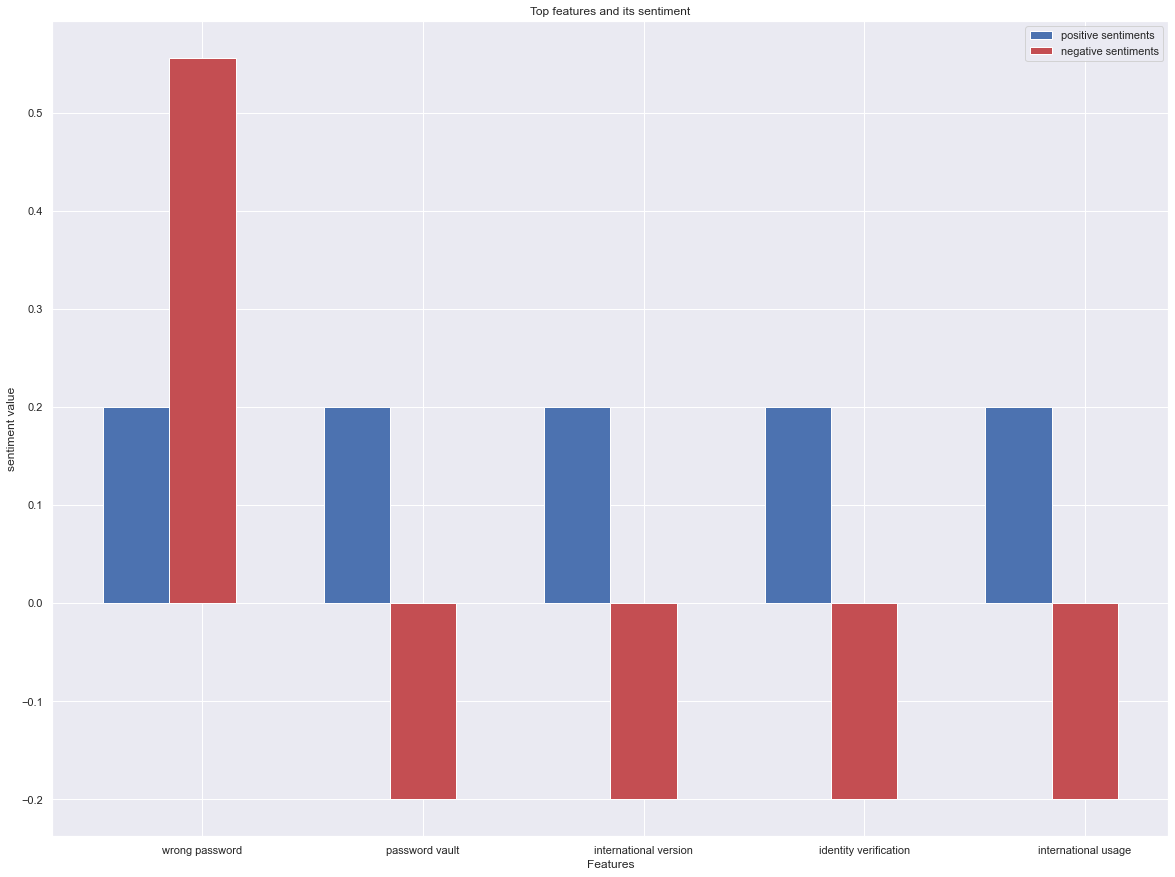

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
newdf

#noun=['positive attitude','good job knowledge','team player','customer acquisition','good visibility','back office process','successful launch','soft skills','suitable candidates','core issues']
#pos_l=[0.71,0.42,0.3,0.2,0.2,0.6,0.2,0.5,0.43,0]
#neg_l=[-0.1,0,-0.300,0,-0.1,0,-0.1,-0.2,0,-0.3]

pos=newdf[0:5]['pos']
neg=newdf[0:5]['neg']

# data to plot
n_groups = 5
positive =newdf['pos'].head(5) 
negative =newdf['neg'].head(5)
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.3
opacity = 1
 
rects1 = plt.bar(index, positive, bar_width,
alpha=opacity,
color='b',
label='positive sentiments')
 
rects2 = plt.bar(index + bar_width, negative, bar_width,
alpha=opacity,
color='r',
label='negative sentiments')
 
plt.xlabel('Features')
plt.ylabel('sentiment value')
plt.title('Top features and its sentiment')
plt.xticks(index + bar_width, newdf['features'].head(5))
plt.legend()
fig.set_size_inches(20, 15)
plt.show()

In [22]:
absa_list = dict()
print(absa_list)
# For each frequent feature
for f in frequent_features:
    # For each comment
    absa_list[f] = list()
    for comment in result:
        blob = TextBlob(comment)
        # For each sentence of the comment
        for sentence in blob.sentences:
            # Search for frequent feature 'f'
            q = '|'.join(f.split())
            if re.search(r'\w*(' + str(q) + ')\w*', str(sentence)):
                absa_list[f].append(sentence)


print("Aspect Specific sentences:")
absa_list

{}
Aspect Specific sentences:


{'wrong password': [Sentence("even my account name and payment password is not working."),
  Sentence("terrible apps reset password 3 times keep telling me wrong password."),
  Sentence("hey i m just copy paste form my password vault how possible it show wrong password."),
  Sentence("lots of useless app icons in first tab but not editable hey i cant even verify my identity when i m stuck at scanning my face to match my passport also i have taken wrong steps to verify my identity but i cant go back to the starting line and stuck at bank id i dont have china bank id so please help to reset everything i ve done before so i can start identify my identity with my passport."),
  Sentence("not working when i log in using same exact password."),
  Sentence("just could use the face or password."),
  Sentence("no password was input."),
  Sentence("not working when i log in using same exact password."),
  Sentence("even my account name and payment password is not working."),
  Sentence("too heav

In [23]:
scores = list()
absa_scores = dict()
for k, v in absa_list.items():
    absa_scores[k] = list()
    for sent in v:
        score = sent.sentiment.polarity
        scores.append(score)
        absa_scores[k].append(score)

C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Men\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


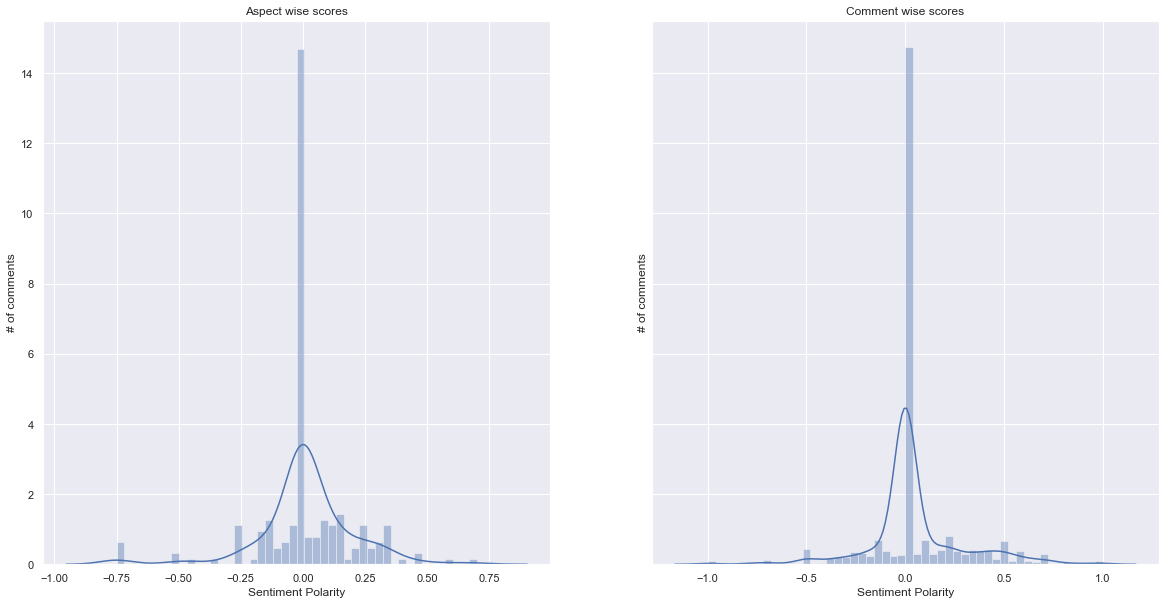

In [24]:
# Now that we have all the scores, let's plot them!
# For comparison, we replot the previous global sentiment polarity plot
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(20, 10))
plot1 = sns.distplot(scores, ax=ax1)

ax1.set_title('Aspect wise scores')
ax1.set_xlabel('Sentiment Polarity')
ax1.set_ylabel('# of comments')

ax2.set_title('Comment wise scores')
ax2.set_xlabel('Sentiment Polarity')
ax2.set_ylabel('# of comments')

plot2 = sns.distplot(sentiment_scores, ax=ax2)

In [25]:
# Create data values for stripplot and boxplot
vals = dict()
vals["aspects"] = list()
vals["scores"] = list()
for k, v in absa_scores.items():
    for score in v:
        vals["aspects"].append(k)
        vals["scores"].append(score)

<AxesSubplot:>

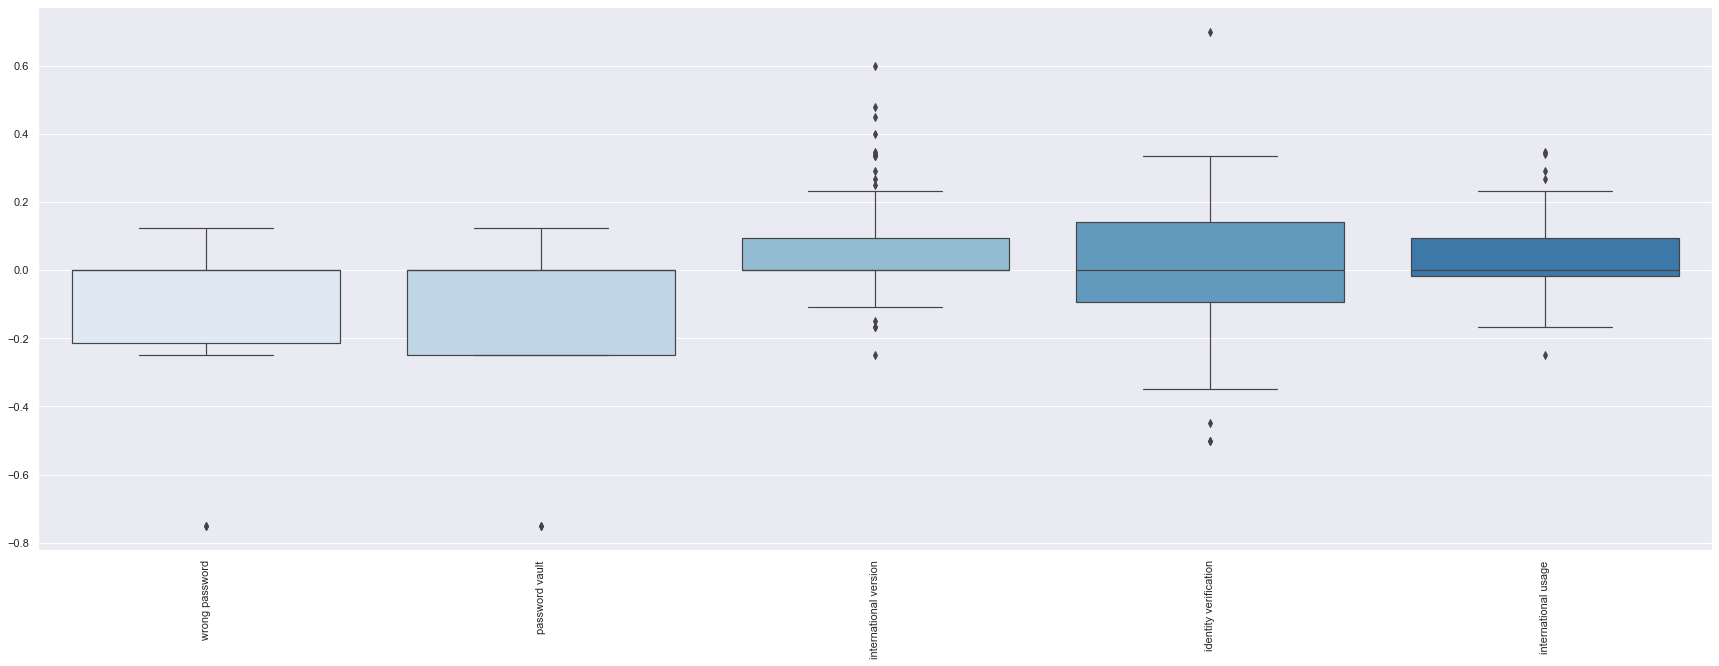

In [26]:
fig, ax1 = plt.subplots(figsize=(30, 10))

color = sns.color_palette("Blues", 6)
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=3) 
sns.boxplot(x="aspects", y="scores", data=vals, palette=color, ax=ax1)

<AxesSubplot:>

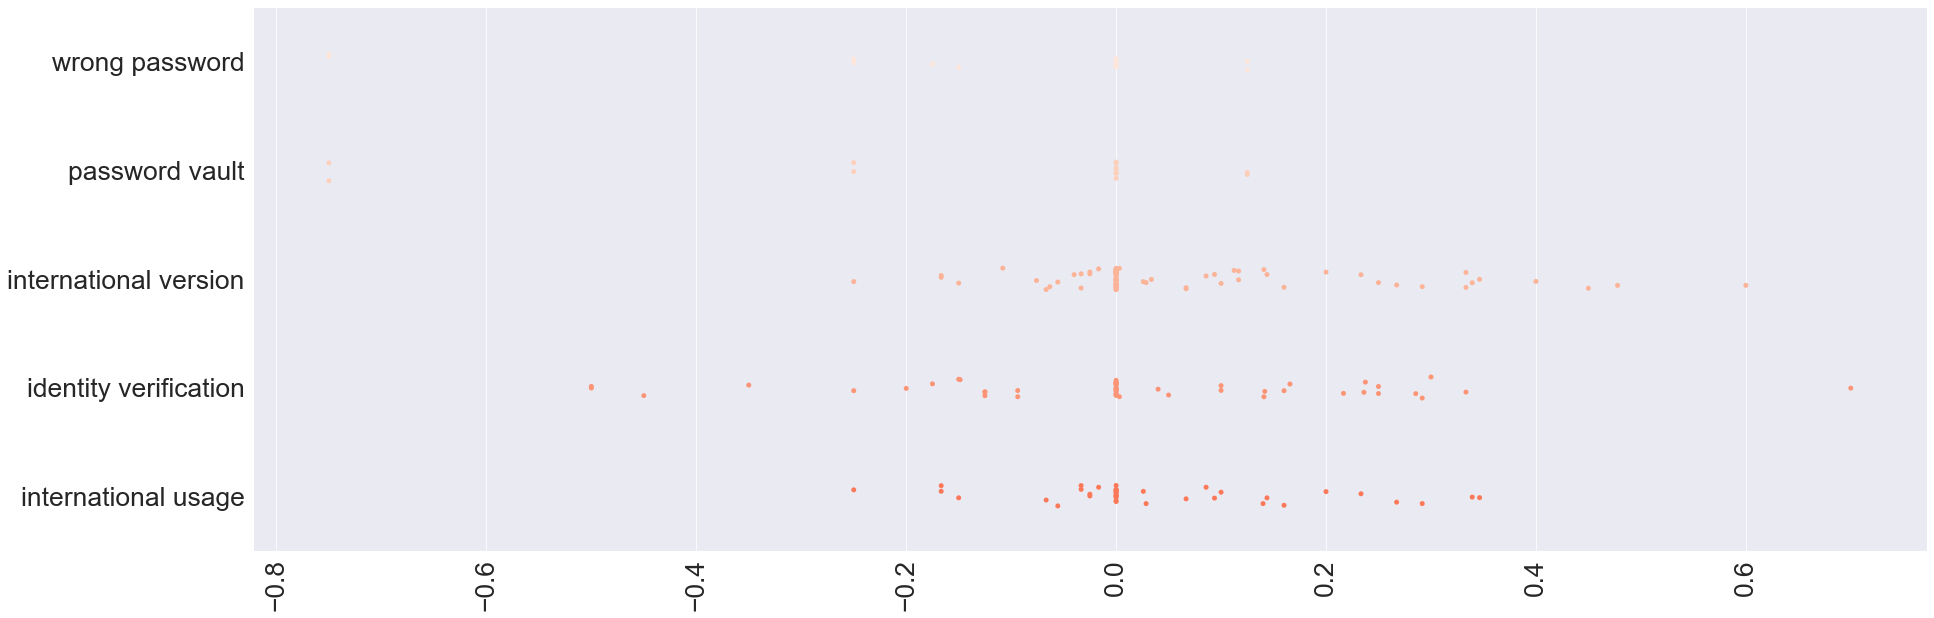

In [27]:
color = sns.color_palette("Reds", 10)
fig, ax1 = plt.subplots(figsize=(30, 10))
plt.xticks(rotation=90)
sns.set_context("paper", font_scale=5) 
sns.stripplot(y="aspects", x="scores",data=vals, palette=color)